In [856]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [1268]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels

In [858]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [859]:
%matplotlib inline

In [860]:
# basic stocl pool
ZZ500Weight = 'LZ_GPA_INDEX_CSI500WEIGHT.csv'
HS300Weight = 'LZ_GPA_INDEX_HS300WEIGHT.csv'


In [861]:
filenamePrice ='LZ_GPA_DERI_AdjustedPriceForward_20.csv'

In [862]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameABNORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'# 偏度

# Volatility factor


# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      #  日均成交量
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子
filenameVOLUME = 'LZ_GPA_QUOTE_TVOLUME.csv'               # 成交量

In [863]:
filenameFCAP = 'LZ_GPA_VAL_A_FCAP.csv'

filenameBENCH = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [864]:
# some useful parameters
startTime =  datetime.strptime('20120101', '%Y%m%d')
endTime = datetime.strptime('20161231', '%Y%m%d')
facNum = 5 # factor Num
path = ff.data_path # path
timeStampNum = 2500 # Number of time period
thresholdNum = 0.05  # thresholdNum to filter stocks by Nan's amount
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [865]:
stockPool = pd.read_csv(path+ZZ500Weight,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
#stockPool = stockPool.iloc[-1].dropna(how='any').index.tolist()  # get today's ZX500 stock pool
stockPool1 = pd.read_csv(path+HS300Weight,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

In [866]:
stockPool = stockPool.dropna(how = 'all',axis =1).columns.tolist()
stockPool1 = stockPool1.dropna(how = 'all',axis =1).columns.tolist()

In [867]:
stockPool = list((set(stockPool1)|set(stockPool)))

In [868]:
len(stockPool)

1186

In [869]:
class dataCleaning():
    
    def __init__(self,data):
        self.__data = data
    #@property
    #def _constructor(self):
    #    return dataCleaning

    #@property
    #def _constructor_sliced(self):
    #   return SubclassedSeries
        
    def narrowData(self):
        return self.__data[stockPool].loc[startTime:endTime]
    
    def Normalize(self,narrowedData):
        dataWinsorized = narrowedData.copy()
        dataWinsorizedTrans = dataWinsorized.T
        MAD = 1.483*np.abs(dataWinsorizedTrans-dataWinsorizedTrans.median(skipna=True))
        return ((dataWinsorizedTrans - dataWinsorizedTrans.mean(axis=0, skipna=True))/dataWinsorizedTrans.std(axis=0, skipna=True)).T

In [870]:
PriceDF = pd.read_csv(path+filenamePrice,infer_datetime_format=True,parse_dates=[0],index_col=0)[stockPool].loc[startTime:endTime]

In [871]:
LFCAPData = np.log10(pd.read_csv(path+filenameFCAP,infer_datetime_format=True,parse_dates=[0],index_col=0))

PBData = pd.read_csv(path+filenamePB,infer_datetime_format=True,parse_dates=[0],index_col=0)

YOYBPSData = pd.read_csv(path+filenameYOYBPS,infer_datetime_format=True,parse_dates=[0],index_col=0)

AMOUNTAVG1MData = pd.read_csv(path+filenameAMOUNTAVG1M,infer_datetime_format=True,parse_dates=[0],index_col=0)

TURNOVER1MData = pd.read_csv(path+filenameTURNOVER1M,infer_datetime_format=True,parse_dates=[0],index_col=0)

PROFITOOPData = pd.read_csv(path+filenamePROFITTOOP,infer_datetime_format=True,parse_dates=[0],index_col=0)

benchmarkData = pd.read_csv(path+filenameBENCH,infer_datetime_format=True,parse_dates=[0],index_col=0)[ZZ500Index].loc[startTime:endTime]

In [872]:
#isinstance(dataCleaning(PBData).narrowData(),dataCleaning)

In [873]:
PBData = dataCleaning(PBData).Normalize(dataCleaning(PBData).narrowData())
LFCAPData  = dataCleaning(LFCAPData ).Normalize(dataCleaning(LFCAPData ).narrowData())
YOYBPSData = dataCleaning(YOYBPSData).Normalize(dataCleaning(YOYBPSData).narrowData())
AMOUNTAVG1MData = dataCleaning(AMOUNTAVG1MData).Normalize(dataCleaning(AMOUNTAVG1MData).narrowData())
TURNOVER1MData = dataCleaning(TURNOVER1MData).Normalize(dataCleaning(TURNOVER1MData).narrowData())
PROFITOOPData = dataCleaning(PROFITOOPData).Normalize(dataCleaning(PROFITOOPData).narrowData())

In [874]:
print PBData.shape[1], LFCAPData.shape[1], YOYBPSData.shape[1], AMOUNTAVG1MData.shape[1], TURNOVER1MData.shape[1], PROFITOOPData.shape[1]

1186 1186 1186 1186 1186 1186


In [875]:
#PROFITOOPData

In [991]:
# independentfactor should be a list contains of dataframe
def orthoFactor(factordf, independentfactor):
    '''
    Muti variable regression for return.
    returndf and dataframes in factorDict should have same index and same columns
    output: Dataframe, the orthogonalized result of factordf
    input: 
    factordf: Dataframe, factor to be orthogonalized
    independentfactor: List,  the values are the factor dataframe as independence in regression(all \
    with same columns and index)
    '''
    emptydf = pd.DataFrame(index = factordf.index, columns = factordf.columns, data= None, dtype =float)
    dfNum = len(independentfactor)
    if dfNum == 0:
        print 'Input is an empty list!'
        raise ValueError
    for date in factordf.index:
        factordfSlice = factordf.loc[date]
        mapfunction = map(lambda x: x.loc[date], independentfactor)
        if dfNum > 1:
            totaldf = pd.concat(mapfunction, axis=1)         
        else:
            totaldf = independentfactor[0].loc[date]
        result = sm.OLS(factordfSlice.T,totaldf ).fit()
        emptydf .loc[date] = result.resid
    return emptydf

In [876]:
PBData = PBData .loc[:, PBData .isnull().sum() < (len(PBData) * thresholdNum)]
LFCAPData  = LFCAPData .loc[:, LFCAPData .isnull().sum() < (len(LFCAPData) * thresholdNum)]
YOYBPSData = YOYBPSData .loc[:, YOYBPSData .isnull().sum() < (len(YOYBPSData) * thresholdNum)]
AMOUNTAVG1MData = AMOUNTAVG1MData .loc[:, AMOUNTAVG1MData .isnull().sum() < (len(AMOUNTAVG1MData) * thresholdNum)]
TURNOVER1MData = TURNOVER1MData .loc[:, TURNOVER1MData .isnull().sum() < (len(TURNOVER1MData) * thresholdNum)]
PROFITOOPData  = PROFITOOPData  .loc[:, PROFITOOPData .isnull().sum() < (len(PROFITOOPData ) * thresholdNum)]

PriceDF = PriceDF.loc[:, (PriceDF.isnull().sum() < (len(PriceDF) * thresholdNum))]

In [877]:
print PBData.shape[1], LFCAPData.shape[1], YOYBPSData.shape[1] ,AMOUNTAVG1MData.shape[1], TURNOVER1MData.shape[1], PROFITOOPData.shape[1]

1078 1093 1140 1086 1086 1143


In [878]:
len(list((DFcolumns(PBData)) & (DFcolumns(YOYBPSData))))

1078

In [879]:
def DFcolumns(df):
    return set(df.columns.tolist())

In [880]:
##
stkPool = list((DFcolumns(PBData)) & (DFcolumns(YOYBPSData)) & (DFcolumns(AMOUNTAVG1MData)) & (DFcolumns(TURNOVER1MData)) & (DFcolumns(PROFITOOPData))\
        & (DFcolumns(PriceDF)))
len(stkPool)

1071

In [881]:
#
def fillData(df,stkPool):
    return df[stkPool].fillna(method='ffill').fillna(method='bfill')

In [882]:
PBData = fillData(PBData,stkPool)
LFCAPData = fillData(LFCAPData,stkPool)
YOYBPSData = fillData(YOYBPSData,stkPool)
AMOUNTAVG1MData = fillData(AMOUNTAVG1MData,stkPool)
TURNOVER1MData = fillData(TURNOVER1MData,stkPool)
PROFITOOPData = fillData(PROFITOOPData,stkPool)

PriceDF = fillData(PriceDF,stkPool)

In [932]:
LFCAPData.shape

(1214, 1071)

In [962]:
orthorizedDF = orthoFactor(YOYBPSData,[PROFITOOPData])

In [963]:
correlationDF1 = ff.showCorrelation(orthorizedDF ,PROFITOOPData, orthorizedDF.index, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,1214.000000,1214.000000
mean,0.001389,-0.048090
std,0.000902,0.114718
min,-0.000074,-0.368550
25%,0.000825,-0.108443
50%,0.001245,-0.043231
75%,0.001831,0.025140
max,0.005471,0.235347


In [965]:
correlationDF = ff.showCorrelation(YOYBPSData ,PROFITOOPData, orthorizedDF.index, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,1214.000000,1214.000000
mean,0.095275,0.363892
std,0.061983,0.155586
min,0.008090,0.145976
25%,0.051428,0.261719
50%,0.084243,0.284862
75%,0.128098,0.560356
max,0.284805,0.634266


In [924]:
orthoFactor(PBData,[LFCAPData,YOYBPSData])

,600507.SH,002344.SZ,000793.SZ,300039.SZ,600059.SH,600501.SH,000713.SZ,002233.SZ,600360.SH,600565.SH,...,600150.SH,600469.SH,600282.SH,600739.SH,600406.SH,600687.SH,600866.SH,000860.SZ,601908.SH,002195.SZ
LZ_GPA_DERI_AdjustedPriceForward_20-d,,,,,,,,,,,,,,,,,,,,,
2012-01-05,-0.377263,0.817910,-0.019514,0.336389,-0.093000,-0.182212,0.080297,-0.260826,-0.537475,-0.373930,...,-0.525790,-0.599379,-0.700208,-0.452856,3.866487,1.164736,-0.499238,-0.372012,-0.310752,0.661021
2012-01-06,-0.370344,0.807951,-0.033858,0.331630,-0.083475,-0.174873,-0.008016,-0.224641,-0.529716,-0.342368,...,-0.519258,-0.584974,-0.695577,-0.428696,3.870769,1.150617,-0.514991,-0.372073,-0.306836,0.694119
2012-01-09,-0.071479,0.059052,-0.032903,0.007236,-0.038524,-0.052797,-0.032796,-0.053024,-0.091473,-0.072893,...,-0.081841,-0.098388,-0.108975,-0.073139,0.398672,0.086776,-0.089531,-0.069367,-0.069264,0.036300
2012-01-10,-0.384463,0.819567,-0.052424,0.333428,-0.084771,-0.174435,0.052174,-0.184946,-0.544890,-0.386419,...,-0.523893,-0.608049,-0.721006,-0.443349,3.792828,1.014716,-0.510021,-0.364589,-0.295955,0.685328
2012-01-11,-0.351141,0.848830,-0.059945,0.303477,-0.099169,-0.173968,0.072290,-0.207998,-0.550314,-0.398641,...,-0.531301,-0.606901,-0.721213,-0.451356,3.833209,1.010454,-0.520227,-0.373125,-0.307323,0.867596
2012-01-12,-0.354879,0.825741,-0.062891,0.277584,-0.100246,-0.163848,0.050273,-0.198887,-0.543286,-0.395281,...,-0.525191,-0.608871,-0.715954,-0.448372,3.730190,1.004743,-0.515610,-0.373257,-0.274771,0.825780
2012-01-13,-0.359135,0.852530,-0.066427,0.212000,-0.100076,-0.160491,0.071527,-0.201071,-0.535010,-0.380636,...,-0.525414,-0.599971,-0.698903,-0.446049,3.640257,1.063589,-0.515156,-0.380268,-0.249726,0.750593
2012-01-16,-0.063506,0.049467,-0.033724,-0.011128,-0.039969,-0.050416,-0.021238,-0.050410,-0.084665,-0.070060,...,-0.075766,-0.090983,-0.098770,-0.068086,0.307385,0.080681,-0.083799,-0.066131,-0.060669,0.039613
2012-01-17,-0.383307,0.819627,-0.060211,0.191063,-0.100658,-0.175895,0.100906,-0.174632,-0.534827,-0.386578,...,-0.514510,-0.599052,-0.696447,-0.419269,3.246474,1.041166,-0.526365,-0.373186,-0.264369,0.792163


In [884]:
returnDF = PriceDF.pct_change()[1:] 
returnOfBench = benchmarkData.pct_change()[1:]

In [885]:
activeReturnDF = returnDF .apply(lambda x: x - returnOfBench )
activeReturnDF.head().iloc[:,2].values

array([ 0.04409089, -0.01318374, -0.01007904, -0.01510373, -0.00549787])

In [886]:
factorReturn = pd.DataFrame(index = returnDF.index, columns = ['LFCA', 'PB', 'YOYBPS', 'AMOUNTAVG1MData', 'TURNOVER1M' ,\
                                                              'PROFITOOP'],data= None ,dtype =float)
factorPvalue =  pd.DataFrame(index = returnDF.index, columns = ['LFCA', 'PB', 'YOYBPS', 'AMOUNTAVG1MData', 'TURNOVER1M' ,\
                                                              'PROFITOOP'],data= None ,dtype =float)

In [887]:
specificReturn = pd.DataFrame(index = returnDF.index, columns = LFCAPData.columns ,dtype =float )

In [981]:
# construct the multiple factor structural risk model
def multiFactorReg(returndf,factorDict):
    '''
    Muti variable regression for return.
    returndf and dataframes in factorDict should have same index and same columns
    output: 3 Dataframe, respectively idiosyncratic return for each stock, factor Return and factor P-value
    input: 
    returndf: Dataframe, can either be return or acticve return
    factorDict: Dictionary, the keys are the names of factors and the values are the corresponding factor dataframe(all \
    with same columns and index)
    '''
    emptydf = pd.DataFrame(index = returndf.index, columns =returndf.columns , data= None, dtype =float)
    factorReturn = pd.DataFrame(index = returndf.index, columns =factorDict.keys(), data= None, dtype =float )
    factorPvalue = pd.DataFrame(index = returndf.index, columns =factorDict.keys(), data= None, dtype =float )
    dfNum = len(factorDict.keys())
    if dfNum == 0:
        print 'Input is an empty list!'
        raise ValueError
    for date in returndf.index:
        returndfSlice = returndf.loc[date]
        mapfunction = map(lambda x: x.loc[date], factorDict.values())
        if dfNum > 1:
            totaldf = pd.concat(mapfunction, axis=1)         
        else:
            totaldf = factorDict.values()[0].loc[date]
        result = sm.OLS(returndfSlice.T,totaldf ).fit()
        emptydf .loc[date] = result.resid
        factorReturn .loc[date] = result.params.values
        factorPvalue . loc[date] = result.pvalues.values
    return emptydf, factorReturn, factorPvalue

In [979]:
factordic = {'LFCA':LFCAPData, 'PB':PBData, 'YOYBPS':YOYBPSData, 'AMOUNTAVG1MData':AMOUNTAVG1MData, 'TURNOVER1M' :TURNOVER1MData,\
                                                              'PROFITOOP':PROFITOOPData}

In [1291]:
multiFactorReg(activeReturnDF,factordic)[0].tail()

,600507.SH,002344.SZ,000793.SZ,300039.SZ,600059.SH,600501.SH,000713.SZ,002233.SZ,600360.SH,600565.SH,...,600150.SH,600469.SH,600282.SH,600739.SH,600406.SH,600687.SH,600866.SH,000860.SZ,601908.SH,002195.SZ
LZ_GPA_DERI_AdjustedPriceForward_20-d,,,,,,,,,,,,,,,,,,,,,
2016-12-26,-0.023122,0.010769,-0.009817,0.006947,0.012481,0.006357,0.008649,0.008887,-0.003876,-0.004927,...,0.002493,0.002654,-0.026140,-0.001668,-0.009431,-0.001582,0.010529,-0.005836,0.008052,0.019347
2016-12-27,-0.004435,-0.000807,0.002591,-0.001878,0.006556,0.001184,0.009099,0.002489,0.005987,0.025400,...,-0.019135,-0.001682,-0.007100,-0.004429,0.004407,0.000556,0.012094,0.007637,-0.007560,-0.007801
2016-12-28,-0.012017,0.002621,-0.020771,-0.006607,-0.004481,0.007649,0.002448,-0.011259,0.005490,-0.010482,...,0.001505,0.034261,-0.000345,-0.006536,-0.005476,0.002957,0.017636,0.008229,0.004232,-0.001179
2016-12-29,0.008727,0.013986,-0.004610,0.008750,0.006758,0.004271,0.006866,0.004027,-0.013295,-0.020404,...,-0.022136,-0.011416,0.042035,0.026898,0.001633,0.001583,-0.010350,0.006314,0.022208,-0.005476
2016-12-30,-0.009606,-0.004527,-0.011325,-0.003919,-0.002088,-0.018438,0.012067,-0.020959,-0.012541,0.006351,...,-0.028871,-0.005890,-0.000246,-0.008862,-0.002014,-0.006388,0.010013,0.047173,0.021147,-0.005549


In [983]:
for date in returnDF.index:
    activeReturnSlice = activeReturnDF .loc[date]
    LFCAPDataSlice = LFCAPData.loc[date]
    PBDataSlice = PBData.loc[date]
    YOYBPSDataSlice = YOYBPSData.loc[date]
    AMOUNTAVG1MDataSlice = AMOUNTAVG1MData .loc[date]
    TURNOVER1MDataSlice = TURNOVER1MData.loc[date]
    PROFITOOPDataSlice = PROFITOOPData.loc[date]
    totalDF = pd.concat([LFCAPDataSlice,PBDataSlice,YOYBPSDataSlice,AMOUNTAVG1MDataSlice,TURNOVER1MDataSlice,PROFITOOPDataSlice],axis=1)
    #print totalDF,PBDataSlice
    result = sm.OLS(activeReturnSlice.T,totalDF ).fit()
    factorReturn . loc[date] = result.params.values
    factorPvalue . loc[date] = result.pvalues.values
    specificReturn .loc[date] = result.resid
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     2016-12-30 00:00:00   R-squared:                       0.091
Model:                             OLS   Adj. R-squared:                  0.085
Method:                  Least Squares   F-statistic:                     17.68
Date:                 Thu, 30 Mar 2017   Prob (F-statistic):           1.33e-19
Time:                         11:40:49   Log-Likelihood:                 3088.4
No. Observations:                 1071   AIC:                            -6165.
Df Residuals:                     1065   BIC:                            -6135.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
2016-12-30 00:00:00     0.0008      0.001      1.482      0.139      -0.000       0.002
2016-12-30 00:00:00     0.0018      0.014      0.133      0.894      -0.025       0.028
2016-12-30 00:00:00    -0.0008      0.001     -0.868      0.386      -0.003       0.001
2016-12-30 00:00:00    -0.0016      0.000     -3.344      0.001      -0.003      -0.001
2016-12-30 00:00:00    -0.0038      0.001     -7.448      0.000      -0.005      -0.003
2016-12-30 00:00:00  4.907e-05      0.000      0.113      0.910      -0.001       0.001
==============================================================================
Omnibus:                      236.186   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.423
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                      10.330   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1287]:
factorReturn.head()

,LFCA,PB,YOYBPS,AMOUNTAVG1MData,TURNOVER1M,PROFITOOP
LZ_GPA_DERI_AdjustedPriceForward_20-d,,,,,,
2012-01-05,0.010764,-0.001083,-0.000036,0.001894,0.001312,-0.039442
2012-01-06,0.000101,-0.000361,0.000318,0.002294,0.001647,-0.022882
2012-01-09,-0.002122,-0.032656,0.000115,0.000528,0.000192,0.050028
2012-01-10,-0.001900,-0.001688,-0.001064,0.000217,-0.001661,0.029091
2012-01-11,-0.003104,0.002084,-0.000630,0.000544,-0.000638,-0.013784


In [1278]:
def calEWMcovariance(facRetdf,decay=0.94):
    '''
    To calculate EWM covariance matrix of given facRetdf
    output: Dataframe, the ewm cov-matrix of the factors
    input:
    facRetdf: Dataframe, factor return dataframe
    decay: float, decay-factors
    Decay factors were set at:
    − 0.94 (1-day) from 112 days of data;
    − 0.97 (1-month) from 227 days of data.
    '''
    m,n = facRetdf.shape
    facDF = facRetdf - facRetdf.mean()
    for i in xrange(m):
        facDF.iloc[i] = np.sqrt(decay**(m-1-i)) * facDF.iloc[i]
    ewmCovMatrix = facDF.T.dot(facDF) *(1-decay)/(1-decay**m)
    return ewmCovMatrix

In [1345]:
compara = 1/0.94 - 1
ewmMatrix = factorReturn.ewm(ignore_na=True, min_periods=0, com=compara).cov(pairwise = True)[-200:].iloc[-1]

In [1274]:
calEWMcovariance(factorReturn.iloc[-200:], decay=0.94)

,LFCA,PB,YOYBPS,AMOUNTAVG1MData,TURNOVER1M,PROFITOOP
LFCA,2.034060e-06,0.000005,-4.466577e-07,-0.000002,-0.000004,7.074628e-07
PB,4.835629e-06,0.000682,-3.420188e-05,-0.000011,-0.000013,2.197088e-05
YOYBPS,-4.466577e-07,-0.000034,3.698684e-06,0.000002,0.000004,1.653468e-07
AMOUNTAVG1MData,-1.761929e-06,-0.000011,1.644020e-06,0.000004,0.000006,-1.845071e-06
TURNOVER1M,-3.809698e-06,-0.000013,4.183206e-06,0.000006,0.000020,1.768827e-06
PROFITOOP,7.074628e-07,0.000022,1.653468e-07,-0.000002,0.000002,6.582387e-06


In [1350]:
# calculate monthly scaled variance  forecast for the market index by DEWIV
alphaS = 21*returnOfBench.ewm(ignore_na=True, min_periods=0, com=compara).cov(pairwise = True)[-200:].iloc[-1]

In [1351]:
alphaS

0.0002192128126956748

In [1307]:
benchmarkWeight = pd.read_csv(path+ZZ500Weight,infer_datetime_format=True,parse_dates=[0],index_col=0)[stkPool].loc[startTime:endTime].fillna(0)

In [1308]:
benchmarkWeight

,600507.SH,002344.SZ,000793.SZ,300039.SZ,600059.SH,600501.SH,000713.SZ,002233.SZ,600360.SH,600565.SH,...,600150.SH,600469.SH,600282.SH,600739.SH,600406.SH,600687.SH,600866.SH,000860.SZ,601908.SH,002195.SZ
LZ_GPA_INDEX_CSI500WEIGHT-d,,,,,,,,,,,,,,,,,,,,,
2012-01-04,0.1384,0.0000,0.3659,0.0000,0.2749,0.1272,0.1678,0.2312,0.1507,0.0000,...,0.0,0.1177,0.0000,0.0,0.0,0.0000,0.1689,0.2531,0.0000,0.0
2012-01-05,0.1424,0.0000,0.3737,0.0000,0.2701,0.1272,0.1702,0.2268,0.1492,0.0000,...,0.0,0.1187,0.0000,0.0,0.0,0.0000,0.1763,0.2516,0.0000,0.0
2012-01-06,0.1463,0.0000,0.3908,0.0000,0.2666,0.1247,0.1590,0.2188,0.1490,0.0000,...,0.0,0.1214,0.0000,0.0,0.0,0.0000,0.1737,0.2479,0.0000,0.0
2012-01-09,0.1476,0.0000,0.3857,0.0000,0.2690,0.1257,0.1474,0.2278,0.1507,0.0000,...,0.0,0.1245,0.0000,0.0,0.0,0.0000,0.1691,0.2476,0.0000,0.0
2012-01-10,0.1473,0.0000,0.3820,0.0000,0.2684,0.1265,0.1461,0.2331,0.1513,0.0000,...,0.0,0.1231,0.0000,0.0,0.0,0.0000,0.1699,0.2523,0.0000,0.0
2012-01-11,0.1463,0.0000,0.3764,0.0000,0.2675,0.1267,0.1544,0.2383,0.1515,0.0000,...,0.0,0.1238,0.0000,0.0,0.0,0.0000,0.1750,0.2522,0.0000,0.0
2012-01-12,0.1529,0.0000,0.3744,0.0000,0.2643,0.1271,0.1573,0.2332,0.1507,0.0000,...,0.0,0.1245,0.0000,0.0,0.0,0.0000,0.1728,0.2500,0.0000,0.0
2012-01-13,0.1512,0.0000,0.3726,0.0000,0.2633,0.1279,0.1543,0.2347,0.1507,0.0000,...,0.0,0.1225,0.0000,0.0,0.0,0.0000,0.1723,0.2483,0.0000,0.0
2012-01-16,0.1496,0.0000,0.3729,0.0000,0.2637,0.1267,0.1570,0.2324,0.1488,0.0000,...,0.0,0.1208,0.0000,0.0,0.0,0.0000,0.1685,0.2445,0.0000,0.0


In [1310]:
riskExposureDF = pd.concat(map(lambda x: x.iloc[-1], factordic .values()), axis=1)  

In [1344]:
factordic .values()[3].iloc[-1].head()

600507.SH    0.116149
002344.SZ   -0.233700
000793.SZ    0.247426
300039.SZ   -0.350758
600059.SH   -0.355085
Name: 2016-12-30 00:00:00, dtype: float64

In [1328]:
# note that dictionary is not  used in the given order, so make sure keys pair the values!
factordic.keys()

['YOYBPS', 'LFCA', 'PB', 'AMOUNTAVG1MData', 'PROFITOOP', 'TURNOVER1M']

In [1341]:
riskExposureDF.columns= factordic.keys()

In [1359]:
riskExposureDF.head()

,YOYBPS,LFCA,PB,AMOUNTAVG1MData,PROFITOOP,TURNOVER1M
600507.SH,0.340788,-0.469033,-0.029513,0.116149,0.022185,0.396599
002344.SZ,0.146407,-0.094015,-0.033699,-0.233700,0.475590,-0.224775
000793.SZ,0.103897,0.469627,-0.032676,0.247426,0.328214,0.206770
300039.SZ,0.148159,-0.867833,-0.028938,-0.350758,0.231069,-0.123416
600059.SH,0.038965,-0.560382,-0.033503,-0.355085,0.037209,-0.329140


In [1354]:
# calculate monthly specific risk of the market index 
alphaSP =  reduce(lambda x,y: x.dot(y),[benchmarkWeight.iloc[-1], specificReturn.cov(), benchmarkWeight.iloc[-1].T ])

In [1355]:
alphaSP

0.015538601502102775

In [1394]:
# calculate total variance of the market index
alphaM = reduce(lambda x,y: x.dot(y),[benchmarkWeight.iloc[-1], riskExposureDF, ewmMatrix, riskExposureDF.T, benchmarkWeight.iloc[-1].T ])

In [1395]:
alphaM

0.0012559991117340936

In [1358]:
ewmMatrix

,LFCA,PB,YOYBPS,AMOUNTAVG1MData,TURNOVER1M,PROFITOOP
LFCA,1.762443e-07,5.634039e-06,-6.009490e-07,-4.492347e-07,-1.102177e-06,2.088250e-08
PB,5.634039e-06,2.066807e-04,-2.181768e-05,-1.545421e-05,-3.750233e-05,7.431083e-07
YOYBPS,-6.009490e-07,-2.181768e-05,2.305524e-06,1.639584e-06,3.981940e-06,-7.862712e-08
AMOUNTAVG1MData,-4.492347e-07,-1.545421e-05,1.639584e-06,1.190497e-06,2.903686e-06,-5.634254e-08
TURNOVER1M,-1.102177e-06,-3.750233e-05,3.981940e-06,2.903686e-06,7.088528e-06,-1.370613e-07
PROFITOOP,2.088250e-08,7.431083e-07,-7.862712e-08,-5.634254e-08,-1.370613e-07,2.689893e-09


In [1372]:
benchmarkWeightDF = pd.DataFrame(benchmarkWeight.iloc[-1])

In [1377]:
benchmarkWeightDF.dot(benchmarkWeightDF.T)

,600507.SH,002344.SZ,000793.SZ,300039.SZ,600059.SH,600501.SH,000713.SZ,002233.SZ,600360.SH,600565.SH,...,600150.SH,600469.SH,600282.SH,600739.SH,600406.SH,600687.SH,600866.SH,000860.SZ,601908.SH,002195.SZ
600507.SH,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
002344.SZ,0.0,0.021874,0.0,0.019183,0.018665,0.0,0.0,0.012823,0.0,0.040391,...,0.0,0.0,0.023087,0.0,0.0,0.036768,0.0,0.031547,0.015633,0.0
000793.SZ,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
300039.SZ,0.0,0.019183,0.0,0.016822,0.016368,0.0,0.0,0.011245,0.0,0.035421,...,0.0,0.0,0.020246,0.0,0.0,0.032243,0.0,0.027665,0.013709,0.0
600059.SH,0.0,0.018665,0.0,0.016368,0.015926,0.0,0.0,0.010942,0.0,0.034465,...,0.0,0.0,0.019700,0.0,0.0,0.031373,0.0,0.026918,0.013339,0.0
600501.SH,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
000713.SZ,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
002233.SZ,0.0,0.012823,0.0,0.011245,0.010942,0.0,0.0,0.007517,0.0,0.023678,...,0.0,0.0,0.013534,0.0,0.0,0.021554,0.0,0.018493,0.009164,0.0
600360.SH,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
600565.SH,0.0,0.040391,0.0,0.035421,0.034465,0.0,0.0,0.023678,0.0,0.074584,...,0.0,0.0,0.042631,0.0,0.0,0.067893,0.0,0.058252,0.028867,0.0


In [1379]:
lastPart =  reduce(lambda x,y: x.dot(y),[ewmMatrix, riskExposureDF.T, benchmarkWeightDF, \
                                         benchmarkWeightDF.T, riskExposureDF,ewmMatrix ])
lastPart

,LFCA,PB,YOYBPS,AMOUNTAVG1MData,TURNOVER1M,PROFITOOP
LFCA,1.893724e-10,7.009437e-09,-7.394211e-10,-5.219816e-10,-1.265786e-09,2.515478e-11
PB,7.009437e-09,2.594476e-07,-2.736896e-08,-1.932065e-08,-4.685187e-08,9.310801e-10
YOYBPS,-7.394211e-10,-2.736896e-08,2.887135e-09,2.038123e-09,4.942374e-09,-9.821906e-11
AMOUNTAVG1MData,-5.219816e-10,-1.932065e-08,2.038123e-09,1.438778e-09,3.488984e-09,-6.933606e-11
TURNOVER1M,-1.265786e-09,-4.685187e-08,4.942374e-09,3.488984e-09,8.460660e-09,-1.681374e-10
PROFITOOP,2.515478e-11,9.310801e-10,-9.821906e-11,-6.933606e-11,-1.681374e-10,3.341369e-12


In [1398]:
finalCovMatrix = ewmMatrix + ((alphaS - alphaM)/(alphaS - alphaSP)) * lastPart
finalCovMatrix

,LFCA,PB,YOYBPS,AMOUNTAVG1MData,TURNOVER1M,PROFITOOP
LFCA,1.762571e-07,5.634513e-06,-6.009991e-07,-4.492701e-07,-1.102262e-06,2.088420e-08
PB,5.634513e-06,2.066982e-04,-2.181953e-05,-1.545552e-05,-3.750550e-05,7.431714e-07
YOYBPS,-6.009991e-07,-2.181953e-05,2.305719e-06,1.639722e-06,3.982275e-06,-7.863377e-08
AMOUNTAVG1MData,-4.492701e-07,-1.545552e-05,1.639722e-06,1.190594e-06,2.903922e-06,-5.634723e-08
TURNOVER1M,-1.102262e-06,-3.750550e-05,3.982275e-06,2.903922e-06,7.089100e-06,-1.370727e-07
PROFITOOP,2.088420e-08,7.431714e-07,-7.863377e-08,-5.634723e-08,-1.370727e-07,2.690119e-09


In [ ]:
####

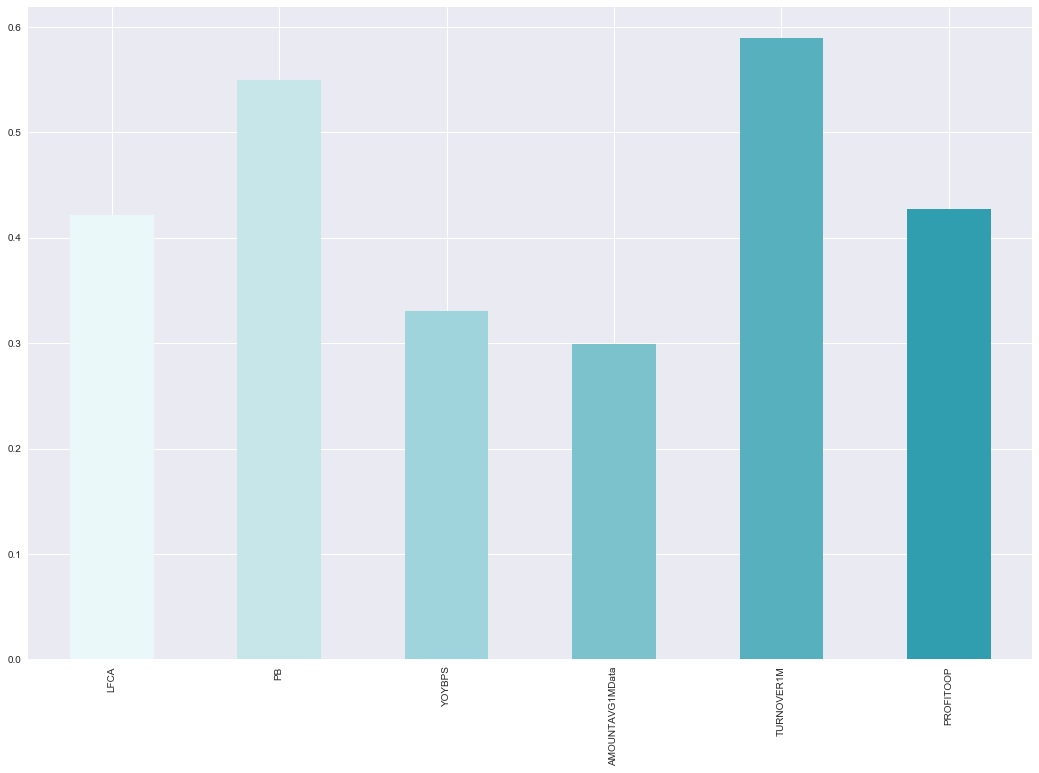

In [958]:
color_set=sns.light_palette((210, 90, 60), input="husl")
(factorPvalue[factorPvalue < 0.05].count()/len(factorPvalue)).plot(figsize=(18,12),kind='bar',color=sns.color_palette(color_set,10))

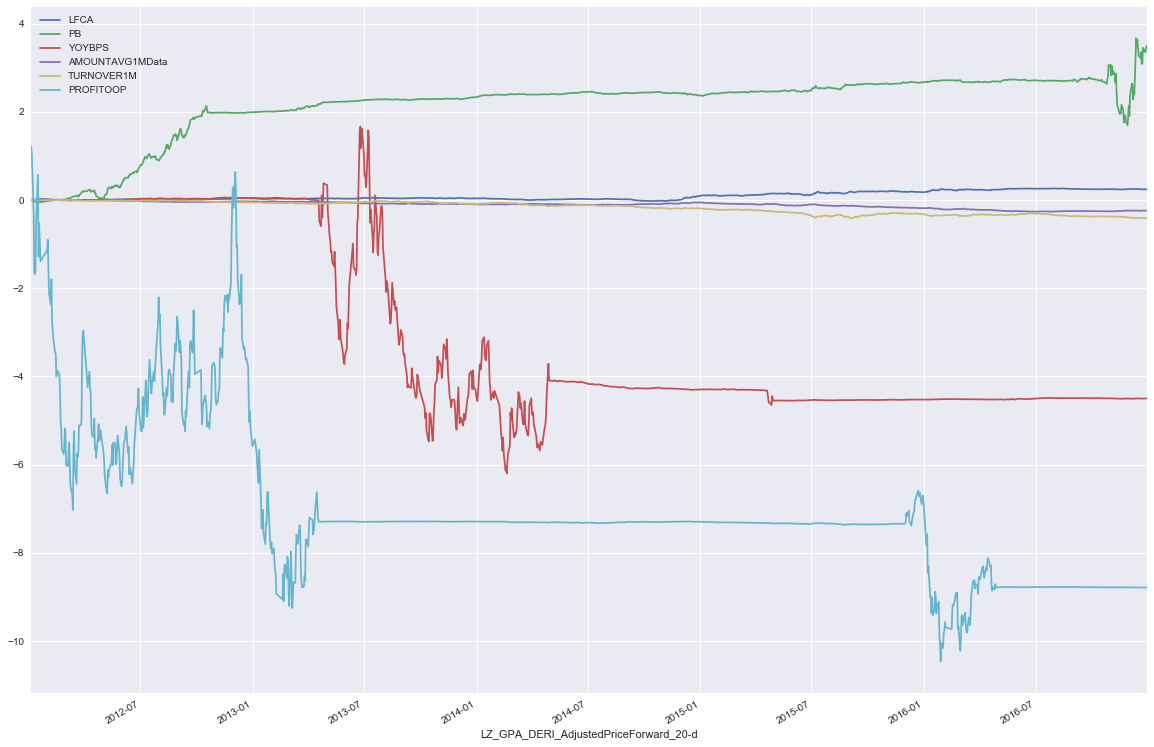

In [959]:
factorReturn.cumsum().plot(figsize=(20,14))

In [960]:
factorReturn.describe()

,LFCA,PB,YOYBPS,AMOUNTAVG1MData,TURNOVER1M,PROFITOOP
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.000199,0.002837,-0.003709,-0.000200,-0.000340,-0.007245
std,0.003413,0.055214,0.167171,0.002003,0.004240,0.259893
min,-0.017642,-0.423627,-0.967839,-0.009816,-0.020335,-1.855616
25%,-0.001436,-0.002341,-0.001946,-0.001253,-0.002307,-0.001820
50%,-0.000123,0.000762,-0.000118,-0.000206,-0.000230,-0.000061
75%,0.001411,0.003896,0.001304,0.000913,0.001748,0.001437
max,0.023239,1.272383,1.920174,0.009174,0.017573,1.414282


In [950]:
result2 = sm.OLS(factorReturn['PB'],factorReturn['LFCA']).fit()

In [912]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PB   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6427
Date:                Tue, 28 Mar 2017   Prob (F-statistic):              0.423
Time:                        17:43:17   Log-Likelihood:                 3117.4
No. Observations:                1213   AIC:                            -6233.
Df Residuals:                    1212   BIC:                            -6228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LFCA          -0.1373      0.171     -0.802      0.423      -0.473       0.199
==============================================================================
Omnibus:                      527.552   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18260.947
Skew:                           1.346   Prob(JB):                         0.00
Kurtosis:                      21.816   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [977]:
specificReturn

,600507.SH,002344.SZ,000793.SZ,300039.SZ,600059.SH,600501.SH,000713.SZ,002233.SZ,600360.SH,600565.SH,...,600150.SH,600469.SH,600282.SH,600739.SH,600406.SH,600687.SH,600866.SH,000860.SZ,601908.SH,002195.SZ
LZ_GPA_DERI_AdjustedPriceForward_20-d,,,,,,,,,,,,,,,,,,,,,
2012-01-05,0.026001,-0.004256,0.037520,0.008555,-0.016781,-0.008408,-0.063448,-0.038088,0.003480,0.043778,...,-0.006049,0.026167,0.018305,0.014955,0.014356,0.047954,-0.010518,-0.016458,-0.035336,-0.028598
2012-01-06,0.009762,-0.002797,-0.014234,-0.000981,0.008059,0.008483,-0.076341,0.035747,0.012279,0.042225,...,0.007533,0.025466,0.007640,0.032694,0.004752,-0.002151,-0.026337,-0.001018,0.006158,0.020107
2012-01-09,-0.002797,-0.003114,-0.008876,0.009404,-0.001909,0.004537,-0.009598,0.023470,0.001596,-0.024066,...,0.002042,-0.014422,-0.013171,0.005616,-0.013977,-0.037630,0.002797,0.019155,0.008869,-0.039620
2012-01-10,-0.007139,-0.004692,-0.014055,-0.018007,-0.002405,-0.000408,0.060557,0.024705,-0.000350,-0.021880,...,-0.001317,0.004661,0.000202,-0.019051,-0.011512,-0.040736,0.030168,-0.000446,0.022065,0.022069
2012-01-11,0.045724,0.012543,-0.004738,-0.021127,-0.011484,0.000322,0.017524,-0.022102,-0.006172,-0.014220,...,-0.007073,0.005363,0.003860,-0.006978,0.004958,-0.005497,-0.012905,-0.007786,-0.008655,0.094106
2012-01-12,-0.009625,-0.009257,-0.003969,-0.016980,-0.002378,0.007950,-0.016873,0.007745,0.001762,-0.001460,...,0.000759,-0.014740,-0.005366,-0.002590,-0.018488,0.001314,-0.001444,-0.005421,0.036527,-0.017248
2012-01-13,-0.009963,0.020254,-0.002355,-0.040732,-0.000094,0.000410,0.018335,-0.008455,-0.005732,0.007908,...,-0.004530,-0.007440,0.008635,0.001401,-0.022615,0.039085,-0.015721,-0.015201,0.032277,-0.026915
2012-01-16,0.020468,-0.022368,0.007315,-0.001943,-0.010344,-0.006432,0.018636,-0.001478,0.008953,0.004268,...,0.005589,0.008765,0.019061,0.020342,-0.070222,0.035679,-0.011930,0.011277,-0.012058,-0.003837
2012-01-17,-0.055333,0.001169,-0.011035,-0.016890,0.003781,-0.005847,0.000053,0.027182,0.001096,-0.007154,...,0.003706,0.005653,0.001189,0.007413,-0.023195,-0.051466,0.003040,-0.003763,0.002881,0.026080


In [966]:
result1 = sm.OLS(returnOfBench, factorReturn).fit()

In [967]:
result1 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              000905.SH   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     307.8
Date:                Wed, 29 Mar 2017   Prob (F-statistic):          3.41e-239
Time:                        16:12:56   Log-Likelihood:                 3664.0
No. Observations:                1213   AIC:                            -7316.
Df Residuals:                    1207   BIC:                            -7285.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
LFCA               -0.7078      0.104     -6.786      0.000      -0.912      -0.503
PB                 -0.0249      0.006     -4.003      0.000      -0.037      -0.013
YOYBPS             -0.0241      0.002    -11.553      0.000      -0.028      -0.020
AMOUNTAVG1MData     0.4917      0.187      2.631      0.009       0.125       0.858
TURNOVER1M          2.8514      0.087     32.746      0.000       2.681       3.022
PROFITOOP          -0.0174      0.001    -13.263      0.000      -0.020      -0.015
==============================================================================
Omnibus:                      213.550   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.817
Skew:                          -0.634   Prob(JB):                    1.33e-308
Kurtosis:                       8.143   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [913]:
result1.resid.head(10)

LZ_GPA_DERI_AdjustedPriceForward_20-d
2012-01-05   -0.030171
2012-01-06   -0.001059
2012-01-09    0.032445
2012-01-10    0.041967
2012-01-11    0.000153
2012-01-12   -0.000846
2012-01-13   -0.028417
2012-01-16   -0.024800
2012-01-17    0.050525
2012-01-18   -0.021567
dtype: float64

In [908]:
print PBData.shape,YOYBPSData.shape,AMOUNTAVG1MData .shape, TURNOVER1MData.shape,PROFITOOPData.shape

(1214, 1071) (1214, 1071) (1214, 1071) (1214, 1071) (1214, 1071)


In [909]:
# 
#stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
#tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
#stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]

In [ ]:
# prepare data
